In [1]:
import sys
sys.path.insert(0, r"..//..//")

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from hotstepper.Steps import Steps
import warnings
warnings.filterwarnings("ignore")



In [2]:
dformat = '%d/%m/%Y %H:%M'

df_vessel_movement= pd.read_csv(r'..//..//data//vessel movements_grouped.csv',parse_dates=True)
df_vessel_movement = df_vessel_movement.sort_values(by=['in'])
df_vessel_movement['in'] = df_vessel_movement['in'].apply(lambda x: pd.to_datetime(x, format=dformat))
df_vessel_movement['out'] = df_vessel_movement['out'].apply(lambda x: pd.to_datetime(x, format=dformat))
df_vessel_movement['remove'] = df_vessel_movement['remove'].apply(lambda x: pd.to_datetime(x, format=dformat))
df_vessel_movement = df_vessel_movement.sort_values(by=['in'])
#df_vessel_movement = df_vessel_movement[df_vessel_movement.BERTH.isin(['D4','D5','K4','K5','K6','K7','K8','K9','K10'])]
#df_vessel_movement['indate'] = pd.to_datetime(df_vessel_movement['in']).dt.date
#df_vessel_movement['outdate'] = pd.to_datetime(df_vessel_movement['out']).dt.date
df_vessel_movement.tail()



,visit_id,vessel_name,in,out,remove,FLAG,BERTH,GRT(MSB),LOA,AFT DRAFT,P/E,AGENT,TUGCO,NO OF TUGS
15,357632,K PHOENIX,NaT,2020-01-01 00:05:00,NaT,PA,K8,75264,269.4,15.01,C,WSS,SV,4
42,357686,STAR AMETHYST,NaT,2020-01-01 17:00:00,NaT,BS,K7,42980,229.0,13.78,H,MON,SV,3
51,357706,ART,NaT,2020-01-01 13:18:00,NaT,0,K9,90086,288.9,15.26,H,LBH,SV,4
70,357735,ORIENT MATE,NaT,2020-01-04 15:50:00,NaT,LR,W3,22888,180.9,6.48,C,MON,SV,2
71,357737,ELSA OLDENDORFF,NaT,2020-01-09 06:00:00,2020-01-05 13:00:00,MT,D2,25431,179.9,9.00,C,MON,SV,1


<AxesSubplot:>

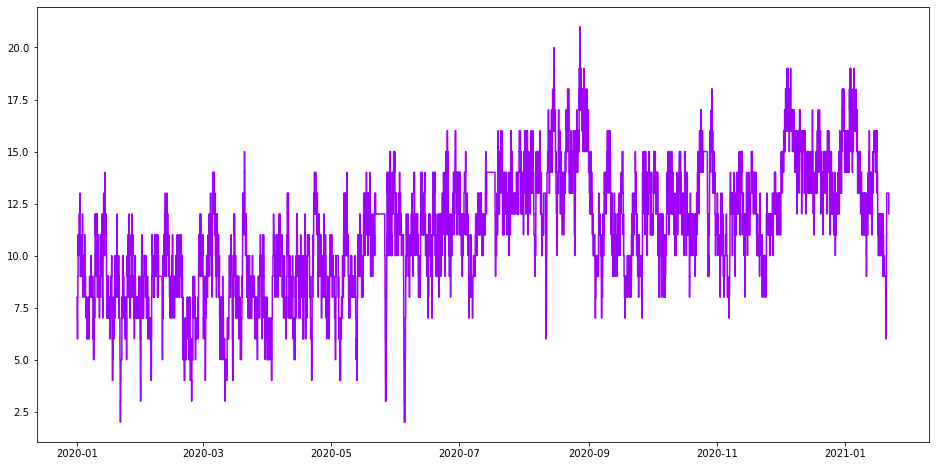

In [3]:
vessel_movement_steps = Steps.read_dataframe(df_vessel_movement, start='in',end='out')
vessel_movement_steps.plot()


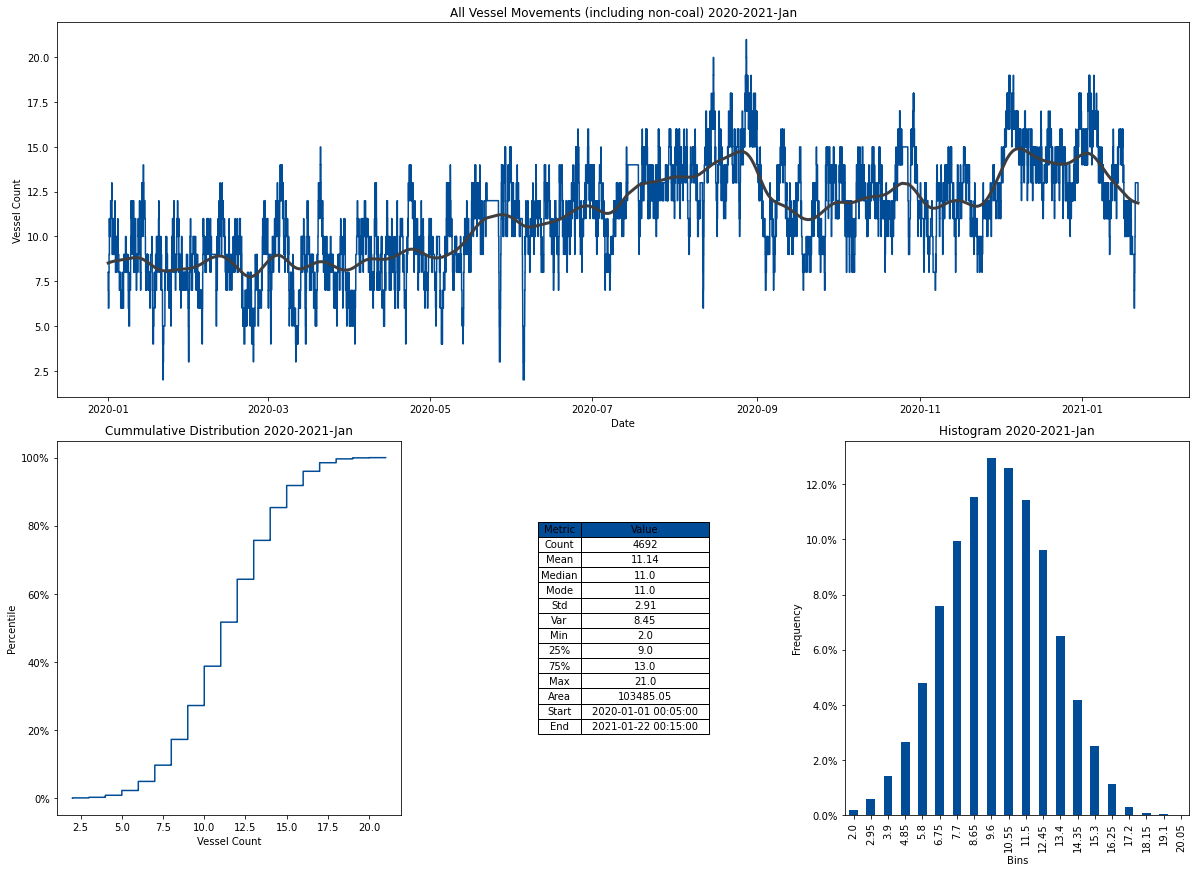

In [8]:
# [steps_plot_ax,
# ecdf_plot_ax, 
# statistics_table_ax, 
# histogram_plot_ax
# ]

plot_params = {
    'ecdf_plot': {'color':"#004c97"},
    'steps_plot': {'color':"#004c97"},
    'smooth_steps_plot': {'color':"#3e3e40"},
    'histogram_plot': {'color':"#004c97", 'label_style':'t'},
    'table_plot': {'color':"#004c97"},}

axess = vessel_movement_steps.summary(plot_params)
axess[0].set_title('All Vessel Movements (including non-coal) 2020-2021-Jan')
axess[0].set_xlabel('Date')
axess[0].set_ylabel('Vessel Count')

axess[1].set_title('Cummulative Distribution 2020-2021-Jan')
axess[1].set_ylabel('Percentile')
axess[1].set_xlabel('Vessel Count')

axess[3].set_title('Histogram 2020-2021-Jan')
axess[3].set_xlabel('Bins');
axess[3].set_ylabel('Frequency');

#axess[3].set_xticklabels(axess[3].get_xticks(), rotation = 0);



In [5]:
colors = ["#004c97","#00b176", "#0098af","#00205b","#3e3e40"]

In [6]:
# ax = vessel_movement_steps.histogram_plot()
# labels = ['[{:<5},{:<5})'.format(round(x[i],precision),round(x[i+1],1)) for i in range(len(x)-1)]
# labels.append('[{:<12},)'.format(round(x[-1],precision)))
# ax.set_xticklabels(labels)